### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import learning_curve

In [32]:
# loading the dataset
data = pd.read_csv('data/NBA.csv')

In [33]:
# checking the data for completeness of input
print("Printing head inf:\n")
data.info()
print('\n-----------------')
print("\nPrinting head info:")
data.head()

Printing head inf:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      4000 non-null   int64  
 1   poss        4000 non-null   int64  
 2   mp          4000 non-null   int64  
 3   do_ratio    4000 non-null   float64
 4   pacing      4000 non-null   float64
 5   win_rating  4000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 187.6 KB

-----------------

Printing head info:


,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


In [34]:
# checking the basic stats of the dataset
print("\nPrinting describe info:")
data.describe()


Printing describe info:


,season,poss,mp,do_ratio,pacing,win_rating
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2001.306750,2781.608750,1379.898500,-1.175324,0.190640,2.044921
std,12.515223,2021.057822,998.745215,3.004908,0.840869,3.473775
min,1977.000000,1.000000,0.000000,-32.624682,-5.965230,-5.428715
25%,1991.000000,960.750000,476.000000,-2.801314,-0.234717,-0.101300
50%,2002.000000,2577.000000,1269.000000,-1.153920,0.088102,0.626639
75%,2012.000000,4340.750000,2155.000000,0.533330,0.509212,3.233072
max,2021.000000,9271.000000,4270.000000,28.370510,23.732063,26.666873


### 1. Defining the feature set and target

Our first objective is to model the performance of the players in comparison to their peers, using the standard *Wins Above Replacement* feature, calculated as (`win_rating`) against the minutes played on court (`mp`)

In [36]:
# Modeling Wins Above Replacement ratio - calculating win_rating against the minutes played, mp

# first we select the relevant columns from the data and convert them into a dataframe
data_wins_ab_rep = data[['win_rating','mp']]

# assigning X and Y values. As mp is our independent variable, we assign it to X
X = data_wins_ab_rep[['mp']]
y = data_wins_ab_rep[['win_rating']]

#### Visualizing the relationship between the win_rating and the minutes played using scatter plot

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_26159/4211941413.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


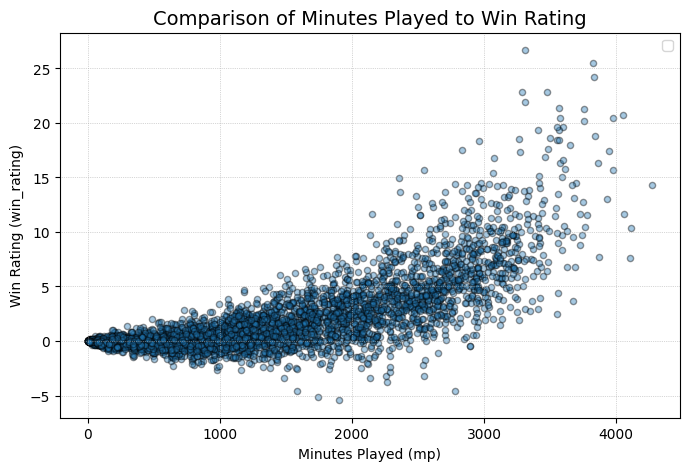

In [58]:
# Building a scatter plot to see a relationshiop between the win rating and minutes played

plt.figure(figsize=(8,5))
plt.scatter(X,y, alpha=0.4, edgecolors='k', s=20)
plt.xlabel('Minutes Played (mp)', fontsize=10)
plt.ylabel('Win Rating (win_rating)',fontsize=10)
plt.title('Comparison of Minutes Played to Win Rating',fontsize=14)
plt.grid(visible=True, linestyle="dotted", linewidth=0.5)
plt.legend()
plt.show();

### 2. Cross-Validation

We utilize sklearn's cross_validate function to run cross-validation fo the dataset for our Linear Regression model that predicts the player's performance rating (`win_rating`) based on the minutes played (`mp`). The output of the cross-validation is saved into (`cv_output`) variable

In [72]:
# we define our prediction model

model = LinearRegression()

# run a cross-validation with the model with 5 folds
cv_output = cross_validate(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_output['test_score']}")
print(f"Mean avg cross-validation scores: {cv_output['test_score'].mean()}")
print(f"Max cross-validation score: {cv_output['test_score'].max()}")
print(f"Min cross-validation score: {cv_output['test_score'].min()}")
print('--------------')
cv_score = cv_output['test_score'].mean()
print(f"Cross-validation score: {cv_score}")

Cross-validation scores: [0.5555057  0.53447908 0.53790391 0.57658459 0.57917762]
Mean avg cross-validation scores: 0.556730180006891
Max cross-validation score: 0.5791776193355004
Min cross-validation score: 0.53447908222725
--------------
Cross-validation score: 0.556730180006891


### 3. Train the model

After running cross-validation, we train the model outside of the cross-validation

In [80]:
# Run a Linear Regression model to predict the player performance rating from the minutes played

# fit the model and get the Intercept and Coefficient/Slope
model.fit(X,y)
slope = model.coef_
intercept = model.intercept_
model_score = model.score(X,y)

print(f"Model coefficient/slope: {slope}")
print(f"Model intercept: {intercept}")
print(f"Model performance score: {model_score}")

Model coefficient/slope: [[0.00260258]]
Model intercept: [-1.54637494]
Model performance score: 0.5599048286723916


A score R-square 0.56 means that 56% of the variance in the target variable (`win_rating`) is explained by the model's input variable (`mp`). Conversely, this also means that 44% of the variance is NOT explained by the model, which suggests room for improvements.

A score of 0.56 is a moderate score, indicating that the model has some predictive power, however, does not capture all the patterns in the data

### 4. Model prediction

We use the trained model to predict the performance rating of a player who played 1000-4000 minutes in total with the 500-minute increment. The predicted value is saved to the variable called (`prediction`)

In [88]:
# Checking the model prediction with the data

# Define the prediction value
predict_value = pd.DataFrame({'mp':[1000,1500,2000,2500,3000,3500,4000]})

# Estimate the prediction based on the given input
prediction = model.predict(predict_value)

print(prediction)

[[1.056205  ]
 [2.35749497]
 [3.65878494]
 [4.96007491]
 [6.26136488]
 [7.56265485]
 [8.86394482]]
